### Summary

This jupyter notebook looks at general representation stats of tracks and artists in the playlist. For example, how many artists appear on only one playlist, or if you appear on a playlist, are you very likely to appear on another playlist? Does this differ between spotify and user curated playlists?

We'll look at type-token ratio, gini index, T-test

In [33]:
import pandas as pd
import numpy as np
import os, re
from datetime import date, timedelta
import matplotlib.pyplot as plt

from analysis_utils import get_num_appearances, get_all_entries, gini

### Type-token ratio

#### Tracks

In [2]:
unique_tracks = pd.read_csv('../spotify_data/all_unique_track.csv')

In [3]:
result = get_num_appearances(unique_tracks[['track_id']], 'track_id', 'spotify_curated')

In [4]:
type_token = len(unique_tracks)/result['total_entries']
print('The type-token ratio for unique tracks in spotify curated is %f' % (type_token * 100))

The type-token ratio for unique tracks in spotify curated is 20.760040


In [11]:
result = get_num_appearances(unique_tracks[['track_id']], 'track_id', 'user_curated')

In [12]:
type_token = len(unique_tracks)/result['total_entries']
print('The type-token ratio for unique tracks in user curated is %f' % (type_token * 100))

The type-token ratio for unique tracks in user curated is 19.604502


#### Artists

In [6]:
unique_artists = pd.read_csv('../spotify_data/all_unique_artist.csv')

In [7]:
result = get_num_appearances(unique_artists[['artist_id']], 'artist_id', 'spotify_curated')

In [9]:
type_token = len(unique_artists)/result['total_entries']
print('The type-token ratio for unique artists in spotify curated is %f' % (type_token * 100))

The type-token ratio for unique artists in spotify curated is 8.936276


In [74]:
result = get_num_appearances(unique_artists[['artist_id']], 'artist_id', 'user_curated')

In [75]:
type_token = len(unique_labels)/result['total_entries']
print('The type-token ratio for unique artists in user curated is %f' % (type_token * 100))

The type-token ratio for unique artists in user curated is 8.438868


#### Labels (artist labels)

In [15]:
unique_labels = pd.read_csv('../spotify_data/all_unique_artist_with_labels.csv')

In [16]:
type_token = len(unique_labels)/96416 # number of entries for spotify curated
print('The type-token ratio for unique artists in spotify curated is %f' % (type_token * 100))

The type-token ratio for unique artists in spotify curated is 10.058497


In [17]:
type_token = len(unique_labels)/102099
print('The type-token ratio for unique artists in user curated is %f' % (type_token * 100))

The type-token ratio for unique artists in user curated is 9.498624


### Gini Coefficient

#### Tracks

In [4]:
unique_tracks = pd.read_csv('../spotify_data/all_unique_track.csv')

In [17]:
df_all = get_all_entries('spotify_curated', ['track_name', 'track_id'])

In [19]:
appearances = []

for index, row in unique_tracks.iterrows():   
    count = len(df_all[df_all['track_id'] == row['track_id']])
    if count != 0:
        appearances.append(count)

# df_count = pd.DataFrame({'num_appearances': appearances})
# df = pd.concat([unique_tracks, df_count], axis=1)

In [37]:
appearances_temp = np.asarray(appearances)
print('Gini coefficient for tracks in spotify curated is %f' % 
      gini(appearances_temp))

Gini coefficient for tracks in spotify curated is 0.487897


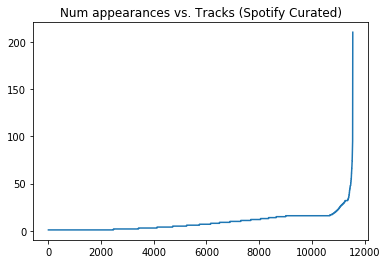

In [38]:
appearances_temp.sort()
plt.title('Num appearances vs. Tracks (Spotify Curated)')
plt.plot(appearances_temp)

In [36]:
df_all = get_all_entries('user_curated', ['track_name', 'track_id'])

In [39]:
appearances = []

for index, row in unique_tracks.iterrows():   
    count = len(df_all[df_all['track_id'] == row['track_id']])
    if count != 0:
        appearances.append(count)

# df_count = pd.DataFrame({'num_appearances': appearances})
# df = pd.concat([unique_tracks, df_count], axis=1)

In [40]:
appearances_temp = np.asarray(appearances)
print('Gini coefficient for tracks in user curated is %f' % 
      gini(appearances_temp))

Gini coefficient for tracks in user curated is 0.480025


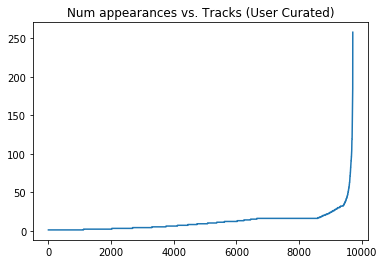

In [41]:
appearances_temp.sort()
plt.title('Num appearances vs. Tracks (User Curated)')
plt.plot(appearances_temp)

#### Artists

In [43]:
unique_artists = pd.read_csv('../spotify_data/all_unique_artist.csv')

In [44]:
df_all = get_all_entries('spotify_curated', ['artist', 'artist_id'])

In [45]:
appearances = []

for index, row in unique_artists.iterrows():   
    count = len(df_all[df_all['artist_id'] == row['artist_id']])
    if count != 0:
        appearances.append(count)

# df_count = pd.DataFrame({'num_appearances': appearances})
# df = pd.concat([unique_tracks, df_count], axis=1)

In [46]:
appearances_temp = np.asarray(appearances)
print('Gini coefficient for artists in spotify curated is %f' % 
      gini(appearances_temp))

Gini coefficient for artists in spotify curated is 0.611535


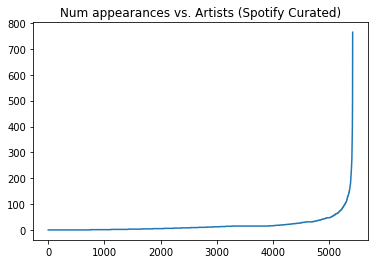

In [47]:
appearances_temp.sort()
plt.title('Num appearances vs. Artists (Spotify Curated)')
plt.plot(appearances_temp)

In [48]:
df_all = get_all_entries('user_curated', ['artist', 'artist_id'])

In [49]:
appearances = []

for index, row in unique_artists.iterrows():   
    count = len(df_all[df_all['artist_id'] == row['artist_id']])
    if count != 0:
        appearances.append(count)

# df_count = pd.DataFrame({'num_appearances': appearances})
# df = pd.concat([unique_tracks, df_count], axis=1)

In [50]:
appearances_temp = np.asarray(appearances2)
print('Gini coefficient for artists in user curated is %f' % 
      gini(appearances_temp))

Gini coefficient for artists in user curated is 0.641565


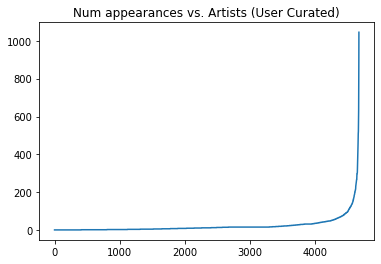

In [51]:
appearances_temp.sort()
plt.title('Num appearances vs. Artists (User Curated)')
plt.plot(appearances_temp)

#### Labels (artist labels)

In [61]:
unique_labels = pd.read_csv('../spotify_data/all_unique_artist_with_labels.csv')
unique_artists = pd.read_csv('../spotify_data/all_unique_artist.csv')

In [62]:
df_all = get_all_entries('spotify_curated', ['track_name', 'track_id','artist_id'])
df_all = df_all.merge(unique_artists[['artist_id','record_label']], on=['artist_id'], how='left')

In [63]:
appearances = []

for index, row in unique_labels.iterrows():   
    count = len(df_all[df_all['record_label'] == row['record_label']])
    if count != 0:
        appearances.append(count)

# df_count = pd.DataFrame({'num_appearances': appearances})
# df = pd.concat([unique_tracks, df_count], axis=1)

In [64]:
appearances_temp = np.asarray(appearances)
print('Gini coefficient for labels in spotify curated is %f' % 
      gini(appearances_temp))

Gini coefficient for labels in spotify curated is 0.757180


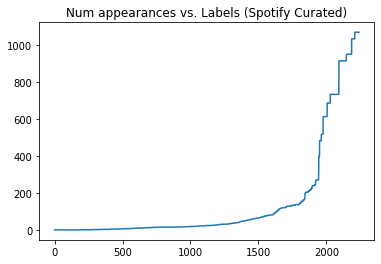

In [65]:
appearances_temp.sort()
plt.title('Num appearances vs. Labels (Spotify Curated)')
plt.plot(appearances_temp)

In [66]:
df_all = get_all_entries('user_curated', ['track_name', 'track_id','artist_id'])
df_all = df_all.merge(unique_artists[['artist_id','record_label']], on=['artist_id'], how='left')

In [68]:
appearances = []

for index, row in unique_labels.iterrows():   
    count = len(df_all[df_all['record_label'] == row['record_label']])
    if count != 0:
        appearances.append(count)

# df_count = pd.DataFrame({'num_appearances': appearances})
# df = pd.concat([unique_tracks, df_count], axis=1)

In [69]:
appearances_temp = np.asarray(appearances2)
print('Gini coefficient for labels in user curated is %f' % 
      gini(appearances_temp))

Gini coefficient for labels in user curated is 0.723282


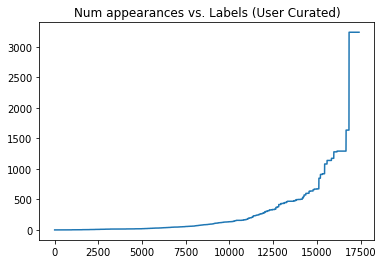

In [70]:
appearances_temp.sort()
plt.title('Num appearances vs. Labels (User Curated)')
plt.plot(appearances_temp)

### T-test??

### Type-token of a single playlist

### Type-token of artists vs. labels